In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.preprocessing import StandardScaler
import joblib

In [28]:
# Load the data
data = pd.read_csv('../data/insurance_dataset.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Data cleaning and Visuallizing

In [30]:
data['smoker'] = (data['smoker'] == 'yes')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,True,southwest,16884.92400
1,18,male,33.770,1,False,southeast,1725.55230
2,28,male,33.000,3,False,southeast,4449.46200
3,33,male,22.705,0,False,northwest,21984.47061
4,32,male,28.880,0,False,northwest,3866.85520


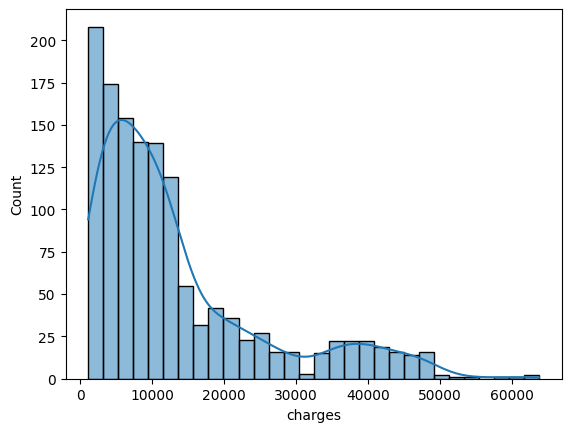

In [72]:
sns.histplot(data['charges'], bins=30, kde=True)
plt.show()

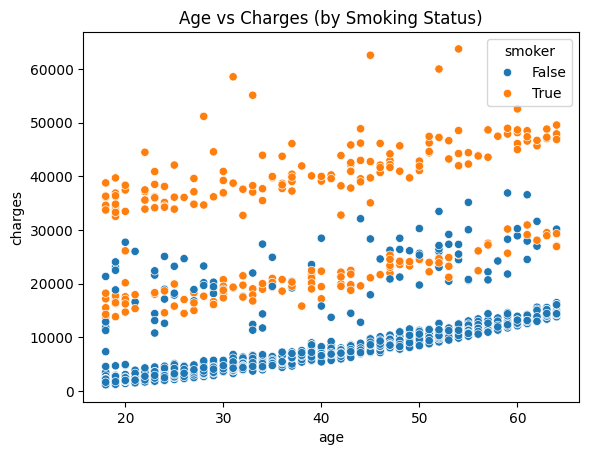

In [76]:
sns.scatterplot(x='age', y='charges', hue='smoker', data=data)
plt.title("Age vs Charges (by Smoking Status)")
plt.show()

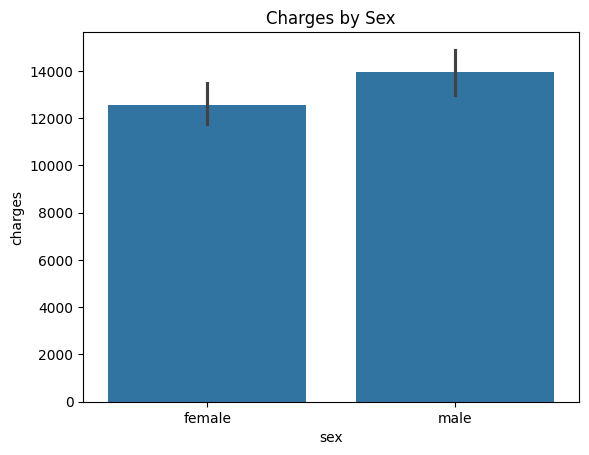

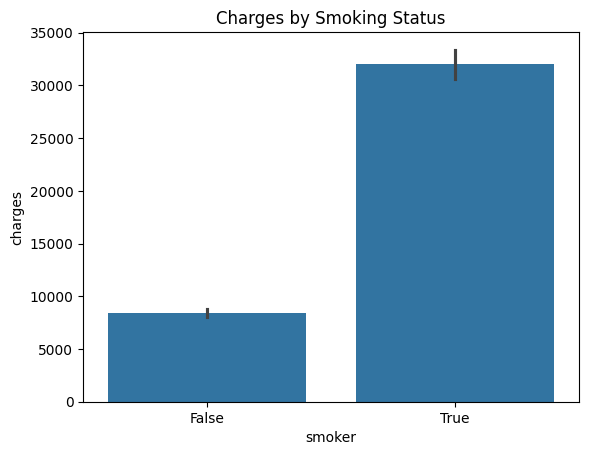

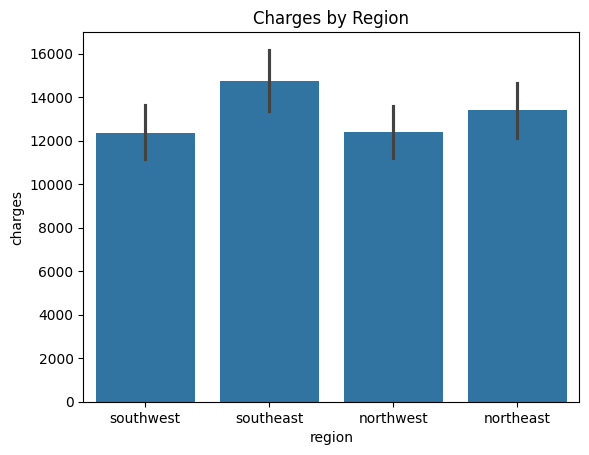

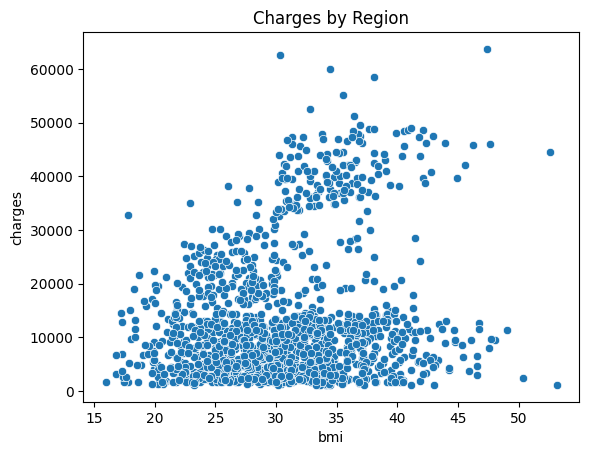

In [83]:
sns.barplot(x='sex', y='charges', data=data)
plt.title("Charges by Sex")
plt.show()
sns.barplot(x='smoker', y='charges', data=data)
plt.title("Charges by Smoking Status")
plt.show()
sns.barplot(x='region', y='charges', data=data)
plt.title("Charges by Region")
plt.show()

sns.scatterplot(x='bmi', y='charges', data=data)
plt.title("Charges by Region")
plt.show()

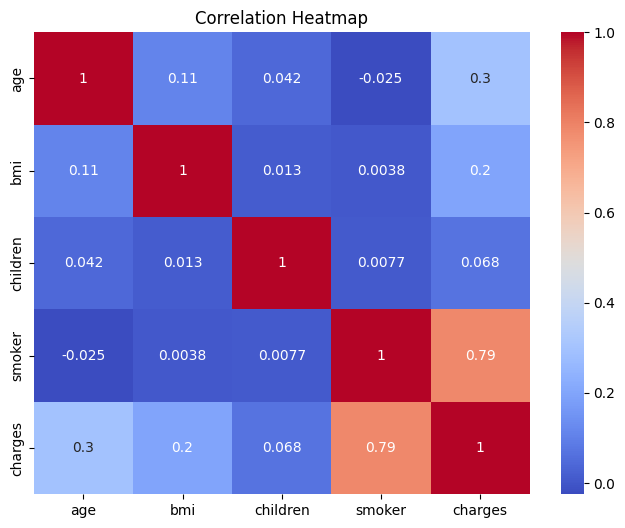

In [84]:
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [85]:
data_encoded = pd.get_dummies(data, drop_first=True)
data_encoded.head()

,age,bmi,children,smoker,charges,sex_male,region_northwest,region_southeast,region_southwest
0,19,27.900,0,True,16884.92400,False,False,False,True
1,18,33.770,1,False,1725.55230,True,False,True,False
2,28,33.000,3,False,4449.46200,True,False,True,False
3,33,22.705,0,False,21984.47061,True,True,False,False
4,32,28.880,0,False,3866.85520,True,True,False,False


In [90]:
X = data_encoded.drop('charges', axis=1)
y = data_encoded['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Linear Regression

In [ ]:

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression


lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

lin_reg.predict(X_test)

print(f"MAE: {mean_absolute_error(y_test, lin_reg.predict(X_test))}")
print(f"MSE: {mean_squared_error(y_test, lin_reg.predict(X_test))}")
print(f"R2: {r2_score(y_test, lin_reg.predict(X_test))}")

MAE: 4181.194473753648
MSE: 33596915.851361446
R2: 0.7835929767120724


Random Forest Regressor

In [93]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

rf.predict(X_test)

print(f"MAE: {mean_absolute_error(y_test, rf.predict(X_test))}")
print(f"MSE: {mean_squared_error(y_test, rf.predict(X_test))}")
print(f"R2: {r2_score(y_test, rf.predict(X_test))}")

MAE: 2549.5003864018345
MSE: 20932325.50270418
R2: 0.8651691044328219


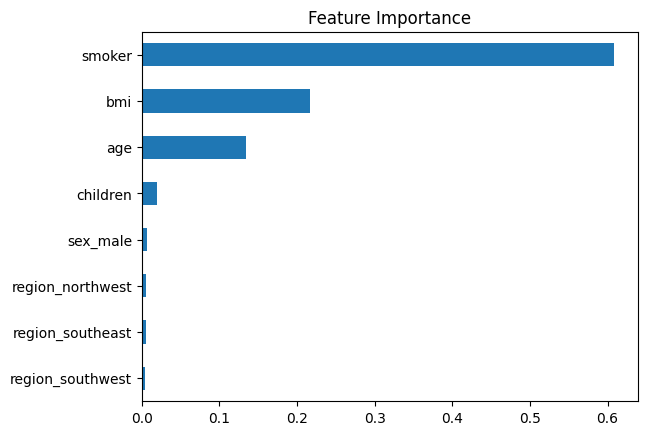

In [94]:
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.sort_values().plot(kind='barh')
plt.title("Feature Importance")
plt.show()

In [98]:
joblib.dump(lin_reg, "linear_regression_model.pkl")
joblib.dump(rf, "random_forest_model.pkl")

['random_forest_model.pkl']

Validation in another data

In [116]:
original_val_df = pd.read_csv("validation.csv")
val_df = original_val_df.copy()
val_df.head()

,age,sex,bmi,children,smoker,region,charges
0,23,male,27.9,0,yes,southwest,16884.92
1,45,female,33.8,1,no,southeast,9310.49
2,56,female,28.3,3,no,northwest,11013.71
3,36,male,29.9,2,no,southwest,6079.00
4,52,female,26.5,0,yes,northwest,27808.73


In [ ]:
#preprocessing the validation data to match the training data
val_df = val_df.drop('charges', axis=1)
val_df['smoker'] = (val_df['smoker'] == 'yes')
val_df_encoded = pd.get_dummies(val_df, drop_first=True)
val_df_encoded.head()

,age,bmi,children,smoker,sex_male,region_northwest,region_southeast,region_southwest
0,23,27.9,0,True,True,False,False,True
1,45,33.8,1,False,False,False,True,False
2,56,28.3,3,False,False,True,False,False
3,36,29.9,2,False,True,False,False,True
4,52,26.5,0,True,False,True,False,False


Prediction on (Random Forest Regression Model)

In [125]:
rf_loaded = joblib.load("random_forest_model.pkl")
val_pred_rf = rf_loaded.predict(val_df_encoded)

# Add predictions back to dataframe
val_df['Predicted_Charges_RF'] = val_pred_rf
val_df.head()

,age,sex,bmi,children,smoker,region,Predicted_Charges_RF,Predicted_Charges_Lin_Reg
0,23,male,27.9,0,True,southwest,18828.283672,26206.842193
1,45,female,33.8,1,False,southeast,8690.615058,10793.830455
2,56,female,28.3,3,False,northwest,13963.614171,12904.298721
3,36,male,29.9,2,False,southwest,6577.424755,7421.140184
4,52,female,26.5,0,True,northwest,23997.148284,33644.921809


Prediction on (Linear Regression Model)

In [124]:
lin_reg_loaded = joblib.load("linear_regression_model.pkl")
val_pred_lin_reg = lin_reg_loaded.predict(val_df_encoded)

# Add predictions back to dataframe
val_df['Predicted_Charges_Lin_Reg'] = val_pred_lin_reg
val_df.head()

,age,sex,bmi,children,smoker,region,Predicted_Charges_RF,Predicted_Charges_Lin_Reg
0,23,male,27.9,0,True,southwest,18828.283672,26206.842193
1,45,female,33.8,1,False,southeast,8690.615058,10793.830455
2,56,female,28.3,3,False,northwest,13963.614171,12904.298721
3,36,male,29.9,2,False,southwest,6577.424755,7421.140184
4,52,female,26.5,0,True,northwest,23997.148284,33644.921809


In [123]:
y_true = original_val_df["charges"]             # actual charges
y_pred_rf = val_df["Predicted_Charges_RF"]
y_pred_lin = val_df["Predicted_Charges_Lin_Reg"]

print("🔹 Random Forest on Validation Data")
print("MAE:", mean_absolute_error(y_true, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred_rf)))
print("R²:", r2_score(y_true, y_pred_rf))

print("\n🔹 Linear Regression on Validation Data")
print("MAE:", mean_absolute_error(y_true, y_pred_lin))
print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred_lin)))
print("R²:", r2_score(y_true, y_pred_lin))

🔹 Random Forest on Validation Data
MAE: 2310.693003610003
RMSE: 3602.669781248915
R²: 0.878594481202203

🔹 Linear Regression on Validation Data
MAE: 3032.732368745269
RMSE: 3914.2606231384125
R²: 0.8566858759858738


Actual Charges Vs Predicted Charges

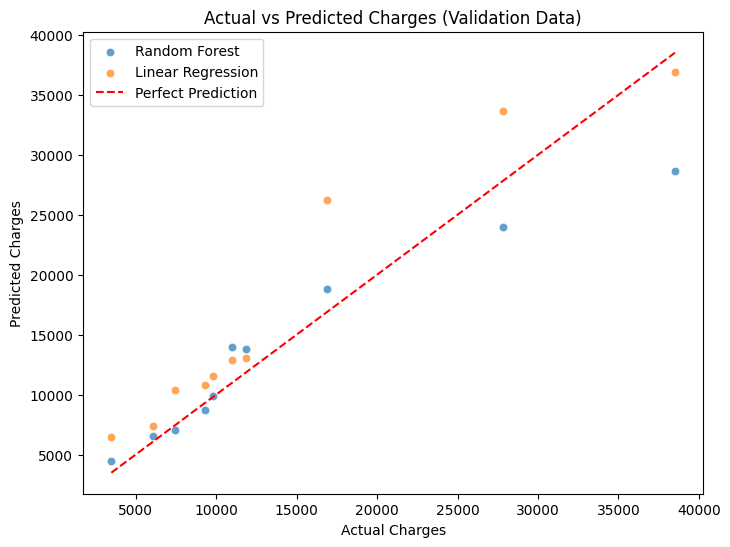

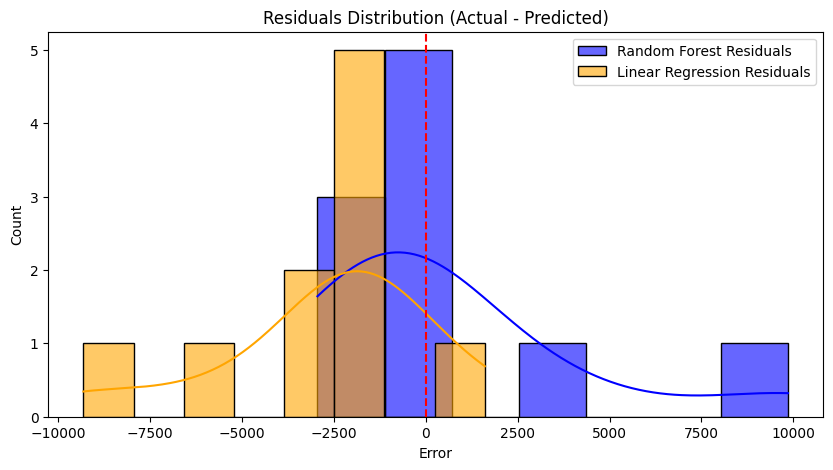

In [122]:
# 1. Scatter plot: Actual vs Predicted
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_true, y=y_pred_rf, label="Random Forest", alpha=0.7)
sns.scatterplot(x=y_true, y=y_pred_lin, label="Linear Regression", alpha=0.7)

# Add perfect prediction line
plt.plot([y_true.min(), y_true.max()],
         [y_true.min(), y_true.max()],
         'r--', label="Perfect Prediction")

plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Charges (Validation Data)")
plt.legend()
plt.show()


# 2. Residuals Distribution
plt.figure(figsize=(10,5))

# Residuals for RF
sns.histplot(y_true - y_pred_rf, kde=True, color="blue", label="Random Forest Residuals", alpha=0.6)

# Residuals for Linear Regression
sns.histplot(y_true - y_pred_lin, kde=True, color="orange", label="Linear Regression Residuals", alpha=0.6)

plt.axvline(0, color="red", linestyle="--")
plt.title("Residuals Distribution (Actual - Predicted)")
plt.xlabel("Error")
plt.ylabel("Count")
plt.legend()
plt.show()